# The Condition Number of a Function
** October 2017 **

** Andrew Riberio @ [AndrewRib.com](http://www.andrewrib.com) **

In this notebook we will explore the notion of condition numbers of functions. Put simply, a condition number is a measurement of how much the output of a function can change with respect to small changes in input. There are different interpretations for how to compute this value in respect to linear functions and non-linear differentiable funcitons which we will explore here.  

Resources:
* https://en.wikipedia.org/wiki/Condition_number
* http://www.deeplearningbook.org/contents/numerical.html
* https://en.wikipedia.org/wiki/Logarithmic_derivative

## Libraries 

In [40]:
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Pretty Latex printing for Sympy with an argument to show the polynomials the way we write them 
# from small term to larger. May give you problems if you don't have a latex distribution. 
sp.init_printing(order='rev-lex',use_latex='mathjax')

## Non-Linear Differentiable Funcitons
See the wikipedia page for a [formal definition](https://en.wikipedia.org/wiki/Condition_number). Let us begin with considering single variable non-linear differentiable functions. In this case we don't get a scalar as our condition number, but a funciton. 

$$\large\frac{x*f'(x)}{f(x)}$$

In [37]:
# Start by defining our helper function to computer the condition number for a function in this class. 
def nlCond(fn):
    x = sp.symbols('x')
    return sp.simplify( (x*sp.diff(fn(x)) ) /fn(x) )

Let's start with considering the condition number of our beloved $e^x$ = $cond(e^x)$ .

x

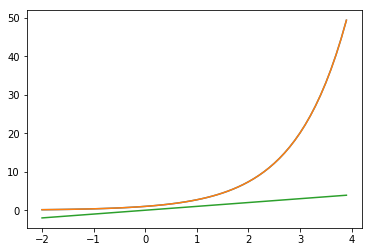

In [48]:
res = nlCond(sp.exp)
display( res )

xs      = np.arange(-2,4,0.1)
ys      = np.exp(xs)

plt.plot(xs,ys)

ys = []

for x_i in xs:
    ys.append(res.subs(x,x_i))

plt.plot(xs,ys)

plt.show()

$\require{cancel}$
It should be no surprise that the $cond(e^x)$ is linear. $$\large\frac{x* \cancel{e^x}}{\cancel{e^x}} = x $$ 
What is the intuition behind this? Because $e^x$ is its own derivitive, every infinitesimal change to x is linearly proportional to the magnitude of that change. $e^x$ is an exemplar of a well conditioned function that behaves in an extremely predictable mannor, and thus it is a baseline for understanding condition numbers.  

Let's move on to $ln(x)$


  1   
──────
log(x)

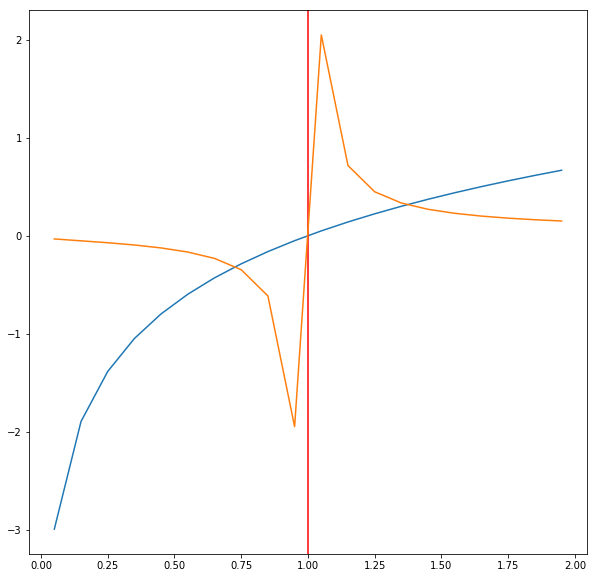

In [201]:
res = nlCond(sp.ln)
display( res )

xs      = np.arange(0.05,2,0.1)
ys      = np.log(xs)

plt.figure(figsize=(10,10))
plt.plot(xs,ys)

plt.axvline(x = 1, color="red" )

ys = []

for x_i in xs:
    ys.append(res.subs(x,x_i)/10)

plt.plot(xs,ys)

plt.show()

An interesting result! For me to plot $cond(ln(x))$ and $ln(x)$ on the same plot, I had to scale down $cond(ln(x))$ by a factor of 10 to show what was going on. We clearly see an asymptote at x = 1 denoted by the red vertical line. Note: The line you see drawn in $cond(ln(x))$ is an artifact of the plotter and does not exist. The reason for the x = 1 asymptote in $cond(ln(x))$ is due to the left hand and right hand limit of $ln(x)$ being different. 

$$\large\lim_{x\to0}ln(x) = -\infty$$ 

In [155]:
sp.limit(sp.ln(x),x, 0)

-∞

$$\large\lim_{x\to\infty}ln(x) = \infty$$ 

In [203]:
sp.limit(sp.ln(x),x, sp.oo)

0

As $ln(x)$ approaches 0, it is asymptotic to negative infinity and as it approaches infinity, it is asymptotic to infinity. $ln(x)$ is very well behaved in all places except for near 1, where it has an identity crisis - and the $cond(ln(x))$ nicely shows this. 

Let's now move into the domain of trig functions and try to make some sense out of the more arcane looking condition numbers. Let's study: $con(sin(x))$

  x   
──────
tan(x)

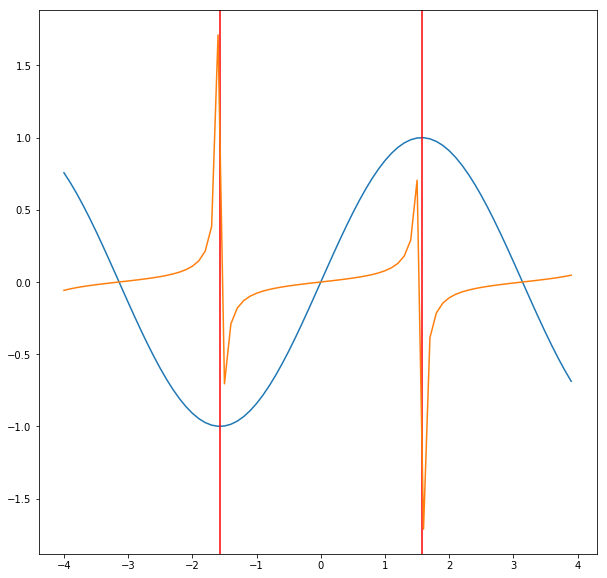

In [200]:
res = nlCond(sp.sin)
display( res )

xs      = np.arange(-4,4,0.1)
ys      = np.sin(xs)

plt.figure(figsize=(10,10))
plt.plot(xs,ys)

plt.axvline(x = np.pi/2, color="red" )
plt.axvline(x = -np.pi/2, color="red" )

ys = []

for x_i in xs:
    #ys.append(res.subs(x,x_i))
    ys.append(sp.tan(x_i)/20)

plt.plot(xs,ys)

plt.show()

Due to the way I'm plotting these figures, it does not completely show the asymptotic nature of these functions, but it should be clear what's going on at this point. We are getting asymptotes in $cond(f(x))$ when the derivative of $f(x)$ is zero. This makes perfect sense in respect to understanding the condition number to be a measure of sensitivity: **at extrema of $f(x)$ we have the most dramatic change in values, and small changes in x at these points can lead to large differences.** 

I'd like to draw your attention to the interval: 
$$\large[\frac{-\pi}{2},\pi/2]$$
As we see there is a smooth transition in the middle, but when we get to the extrema of sin(x), these end points, our $cond(sin(x))$ blows up. 

**Theorem:** Wherever there's an asymptote at $cond(f)(x)$ there's a local minima/maxima at $f(x)$ IFF $f$ does not have an asymptote. 